# Stress Analysis in Social Media

# Group number- 13
## Group members:
Ariel Tzur,
Yael Cohen,
Nicole Ben Haim

Link- https://www.kaggle.com/code/gustavoliberado/stress-analysis-in-social-media/data?select=dreaddit-test.csv

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## About the survey:

We did a survey among those around us due to questions that came to us from the project.

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/NicoleBenHaim/My-Data/main/review_new.csv")
review=df.copy()

### Arranging the data of the survey:

In [8]:
review['frequency'].replace({"כל יום":1,"אחת לשבוע":2,"אחת לחודש":3,"פעם במספר חודשים או יותר":4}, inplace = True)
review.replace({'לא':0,'כן במידה מועטה':1,'כן במידה רבה':1,'כן':1},inplace = True)
list_exs = review["The causes of stress"].str.split(";", n = 8, expand = True)
review["choice1"]= list_exs[0]
review["choice2"]= list_exs[1]
review["choice3"]= list_exs[2]
review["choice4"]= list_exs[3]
review["choice5"]= list_exs[4]
review["choice6"]= list_exs[5]
review["choice7"]= list_exs[6]
review["choice8"]= list_exs[7]
review["choice9"]= list_exs[8]
melted_df = pd.melt(review, value_vars=['choice1','choice2', 'choice3', 'choice4','choice5', 'choice6', 'choice7','choice8'])
melted_df.replace({'זוגיות' : 1, "מצב כלכלי" :2,"לימודים" :3,"עבודה" :4,"בריאות":5,"הרצון להגיע להישיגים":6,"הפן החברתי":7,"דימוי גוף":8,"משפחה" :9}, inplace = True)

In [9]:
review.head()

,gender,age,Status in life,Relationships,The causes of stress,sharing,best sharing,frequency,Stress you have experienced in the past and affecting you today,Stress that affected your health,choice1,choice2,choice3,choice4,choice5,choice6,choice7,choice8,choice9
0,1,18-28,1,1,זוגיות;מצב כלכלי;משפחה;בריאות;הרצון להגיע להיש...,0,1;2,1,0,0,זוגיות,מצב כלכלי,משפחה,בריאות,הרצון להגיע להישיגים,None,None,None,None
1,0,18-28,1,0,מצב כלכלי;לימודים,0,1,2,1,0,מצב כלכלי,לימודים,None,None,None,None,None,None,None
2,0,18-28,1,1,מצב כלכלי;לימודים;דימוי גוף,0,1;2,3,0,0,מצב כלכלי,לימודים,דימוי גוף,None,None,None,None,None,None
3,1,18-28,3,0,הפן החברתי;לימודים;הרצון להגיע להישיגים,0,1,2,1,1,הפן החברתי,לימודים,הרצון להגיע להישיגים,None,None,None,None,None,None
4,1,18-28,1,0,הרצון להגיע להישיגים,0,1,4,0,0,הרצון להגיע להישיגים,None,None,None,None,None,None,None,None


In [10]:
melted_df.head()

,variable,value
0,choice1,1.0
1,choice1,2.0
2,choice1,2.0
3,choice1,7.0
4,choice1,6.0


# About the data:

A dataset of lengthy multi-domain social media data for identifying stress from five different categories of Reddit communities.
The columns in the data are measured by LIWC-Linguistic Inquiry and Word Count.
LIWC reads a given text and compares each word in the text to the list of dictionary words and calculates the percentage of total words in the text that match each of the dictionary categories.

************

<div>
<img src="https://raw.githubusercontent.com/NicoleBenHaim/My-Data/main/laptop-which-there-is-world-people-drawn-1.webp" width="500"
</div>

*************

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/NicoleBenHaim/My-Data/main/dreaddit-test.csv")
data.shape
data.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


### We will check the data:
- Treat missing values 
- Treat data types 

In [12]:
col=['label','id','subreddit','lex_liwc_i','lex_liwc_we','lex_liwc_you','lex_liwc_shehe','lex_liwc_they','lex_liwc_negate','lex_liwc_compare','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_anger','lex_liwc_sad','lex_liwc_family','lex_liwc_social','lex_liwc_friend','lex_liwc_female','lex_liwc_male','lex_liwc_differ','lex_liwc_see','lex_liwc_hear','lex_liwc_feel','lex_liwc_body','lex_liwc_health','lex_liwc_sexual','lex_liwc_ingest','lex_liwc_affiliation','lex_liwc_achieve','lex_liwc_power','lex_liwc_risk','lex_liwc_focuspast','lex_liwc_focuspresent','lex_liwc_focusfuture','lex_liwc_motion','lex_liwc_time','lex_liwc_work','lex_liwc_money','lex_liwc_death','lex_liwc_swear','lex_liwc_Parenth','lex_liwc_relig']
data2= data[col].copy()

### Treat missing values
### Check if there are missing values:

In [13]:
col_num=['label','lex_liwc_i','lex_liwc_we','lex_liwc_you','lex_liwc_shehe','lex_liwc_they','lex_liwc_negate','lex_liwc_compare','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_anger','lex_liwc_sad','lex_liwc_family','lex_liwc_social','lex_liwc_friend','lex_liwc_female','lex_liwc_male','lex_liwc_differ','lex_liwc_see','lex_liwc_hear','lex_liwc_feel','lex_liwc_body','lex_liwc_health','lex_liwc_sexual','lex_liwc_ingest','lex_liwc_affiliation','lex_liwc_achieve','lex_liwc_power','lex_liwc_risk','lex_liwc_focuspast','lex_liwc_focuspresent','lex_liwc_focusfuture','lex_liwc_motion','lex_liwc_time','lex_liwc_work','lex_liwc_money','lex_liwc_death','lex_liwc_swear','lex_liwc_Parenth','lex_liwc_relig']
num_data2= data[col_num].copy()
num_data2.isnull().sum()

label                    0
lex_liwc_i               0
lex_liwc_we              0
lex_liwc_you             0
lex_liwc_shehe           0
lex_liwc_they            0
lex_liwc_negate          0
lex_liwc_compare         0
lex_liwc_posemo          0
lex_liwc_negemo          0
lex_liwc_anx             0
lex_liwc_anger           0
lex_liwc_sad             0
lex_liwc_family          0
lex_liwc_social          0
lex_liwc_friend          0
lex_liwc_female          0
lex_liwc_male            0
lex_liwc_differ          0
lex_liwc_see             0
lex_liwc_hear            0
lex_liwc_feel            0
lex_liwc_body            0
lex_liwc_health          0
lex_liwc_sexual          0
lex_liwc_ingest          0
lex_liwc_affiliation     0
lex_liwc_achieve         0
lex_liwc_power           0
lex_liwc_risk            0
lex_liwc_focuspast       0
lex_liwc_focuspresent    0
lex_liwc_focusfuture     0
lex_liwc_motion          0
lex_liwc_time            0
lex_liwc_work            0
lex_liwc_money           0
l

### Fixing data types
### Check if any of the data types need to be fixed:

In [14]:
num_data2.info()
num_data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   label                  715 non-null    int64  
 1   lex_liwc_i             715 non-null    float64
 2   lex_liwc_we            715 non-null    float64
 3   lex_liwc_you           715 non-null    float64
 4   lex_liwc_shehe         715 non-null    float64
 5   lex_liwc_they          715 non-null    float64
 6   lex_liwc_negate        715 non-null    float64
 7   lex_liwc_compare       715 non-null    float64
 8   lex_liwc_posemo        715 non-null    float64
 9   lex_liwc_negemo        715 non-null    float64
 10  lex_liwc_anx           715 non-null    float64
 11  lex_liwc_anger         715 non-null    float64
 12  lex_liwc_sad           715 non-null    float64
 13  lex_liwc_family        715 non-null    float64
 14  lex_liwc_social        715 non-null    float64
 15  lex_li

(715, 41)

In [15]:
col_num_noLabel=['lex_liwc_i','lex_liwc_we','lex_liwc_you','lex_liwc_shehe','lex_liwc_they','lex_liwc_negate','lex_liwc_compare','lex_liwc_posemo','lex_liwc_negemo','lex_liwc_anx','lex_liwc_anger','lex_liwc_sad','lex_liwc_family','lex_liwc_social','lex_liwc_friend','lex_liwc_female','lex_liwc_male','lex_liwc_differ','lex_liwc_see','lex_liwc_hear','lex_liwc_feel','lex_liwc_body','lex_liwc_health','lex_liwc_sexual','lex_liwc_ingest','lex_liwc_affiliation','lex_liwc_achieve','lex_liwc_power','lex_liwc_risk','lex_liwc_focuspast','lex_liwc_focusfuture','lex_liwc_motion','lex_liwc_time','lex_liwc_work','lex_liwc_money','lex_liwc_death','lex_liwc_swear','lex_liwc_Parenth','lex_liwc_relig']
no_label_num_data=num_data2[col_num_noLabel]

## Understanding the data:
Check from all the data what percentage is diagnosed as stressed or not.

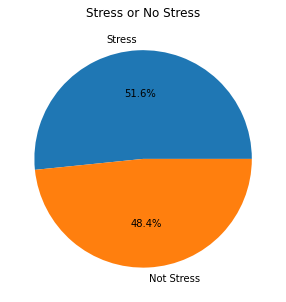

In [16]:
data2['W_label']=data2['label'].replace({0 : 'Not Stress', 1 : 'Stress'})
data2['W_label'].value_counts()
plt.figure(1, figsize=(5,5))
plt.title("Stress or No Stress")
data2['W_label'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("") 
plt.show()

# Conclusion number 1
## The most commonly used words among people who are diagnosed as stressed people.
### Most people who are diagnosed as stressed people tend to formulate themselves as first-person pronouns.

In [17]:
num_data_stress=no_label_num_data.loc[num_data2['label']==1]
data_stress_count=num_data_stress[(num_data_stress[col_num_noLabel]!=0)].count()
data_stress_count.sort_values(ascending=False)

lex_liwc_i              369
lex_liwc_time           360
lex_liwc_negemo         344
lex_liwc_social         344
lex_liwc_differ         337
lex_liwc_focuspast      333
lex_liwc_negate         313
lex_liwc_power          308
lex_liwc_compare        307
lex_liwc_motion         266
lex_liwc_posemo         263
lex_liwc_affiliation    239
lex_liwc_feel           222
lex_liwc_achieve        221
lex_liwc_anx            221
lex_liwc_health         216
lex_liwc_focusfuture    215
lex_liwc_work           202
lex_liwc_anger          197
lex_liwc_shehe          188
lex_liwc_risk           183
lex_liwc_sad            173
lex_liwc_male           167
lex_liwc_body           151
lex_liwc_female         125
lex_liwc_family         118
lex_liwc_friend         114
lex_liwc_see            109
lex_liwc_hear           108
lex_liwc_they            91
lex_liwc_we              90
lex_liwc_Parenth         89
lex_liwc_swear           84
lex_liwc_money           81
lex_liwc_ingest          70
lex_liwc_you        

# Conclusion number 2

## In the group of people diagnosed as stressed people, there are 90% who refer to the past in their texts.

In [18]:
focuspast_data = num_data_stress.loc[num_data_stress.lex_liwc_focuspast != 0]
print("The percent of people that talk about the past is:" ,(len(focuspast_data)/len(num_data_stress)*100))

The percent of people that talk about the past is: 90.2439024390244


## Sub-conclusion
### We can see by the survey data that the stress that people are dealing with coming from the things that happend in the past.

In [19]:
number_stress_r=review['Stress you have experienced in the past and affecting you today'][review['Stress you have experienced in the past and affecting you today']==1].count()
number_stress_r/len(review)*100

61.36363636363637

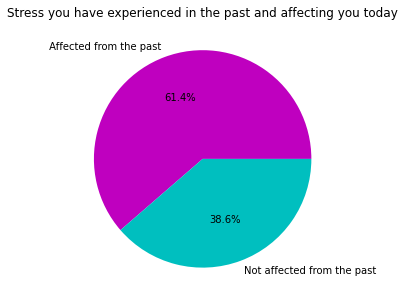

In [20]:
plt.figure(1, figsize=(5,5))
review['Stress you have experienced in the past and affecting you today'].replace({1:' Affected from the past',0:'Not affected from the past'}, inplace = True)
plt.title('Stress you have experienced in the past and affecting you today')
review['Stress you have experienced in the past and affecting you today'].value_counts().plot.pie(autopct="%1.1f%%", colors =['m','c']) 
plt.ylabel("") 
plt.show()

# Conclusion number 3
## The most common categories among people diagnosed as people with stress.

In [21]:
data_stress=data2.loc[num_data2['label']==1]
data_not_stress=data2.loc[num_data2['label']==0]

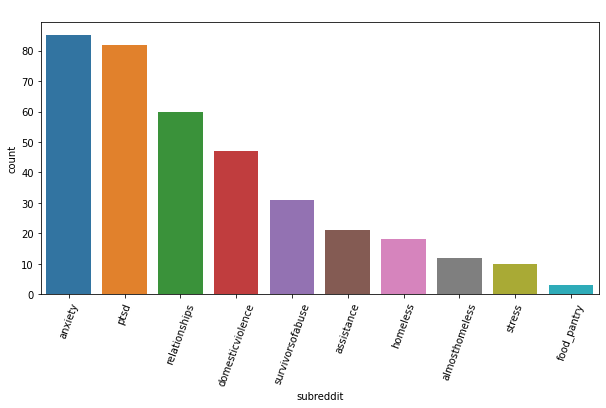

In [22]:
my_order=['anxiety','ptsd','relationships','domesticviolence','survivorsofabuse','assistance','homeless','almosthomeless','stress','food_pantry']
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot( x="subreddit", data=data_stress, order=my_order)
plt.title(" ")
plt.xticks(rotation=70)
plt.show()

# Sub-conclusion

Total amount of texts in each category

In [23]:
data2['subreddit'].value_counts()

anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64

The total amount of texts in each category among the people diagnosed as people with stress

In [24]:
data_stress['subreddit'].value_counts()

anxiety             85
ptsd                82
relationships       60
domesticviolence    47
survivorsofabuse    31
assistance          21
homeless            18
almosthomeless      12
stress              10
food_pantry          3
Name: subreddit, dtype: int64

Comparison of the number of people diagnosed as stressed versus non-stressed people

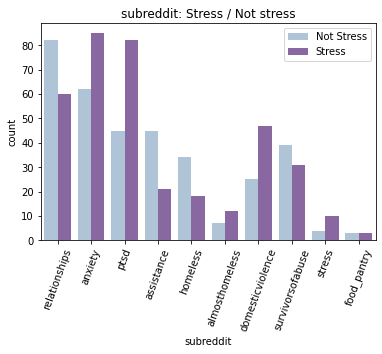

In [25]:
fig=sns.countplot(x="subreddit", data=data2, hue = 'W_label', palette="BuPu")
plt.xticks(rotation=70)
fig.set_title("subreddit: Stress / Not stress")
plt.legend(title='', loc=('upper right')) 
plt.show()

## From the servery we conducted:
The amount of people who are under pressure in each category 

In [26]:
melted_df.replace({1 : 'Relationships', 2 :'financial',3 :'Studies',4 :'Working',5:'health',6:'achieve',7:'Friend status',8:'Body image',9 :'Family'}, inplace = True)
melted_df[['value']].value_counts()

value        
Studies          64
financial        57
achieve          44
Working          30
Relationships    25
Body image       23
Family           23
health           22
Friend status    10
dtype: int64

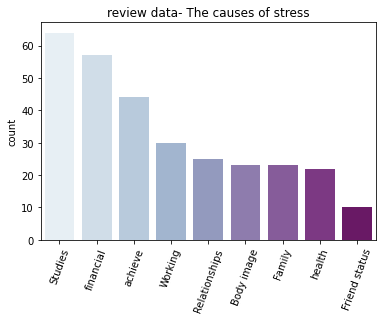

In [27]:
my_order=['Studies','financial','achieve','Working','Relationships','Body image','Family','health','Friend status']
fig=sns.countplot(x="value", data=melted_df, palette="BuPu",order=my_order)
plt.xticks(rotation=70)
fig.set_title("review data- The causes of stress")
fig.set_xlabel("")
plt.show()

### It can be seen from the survey we conducted that there is a direct link between the mental stress we experience and our health. The more often we experience stress, the more our health is harmed

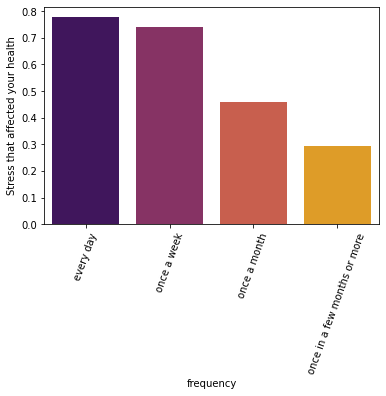

In [28]:
review['frequency'].replace({1:'every day',2:'once a week',3:'once a month',4:'once in a few months or more'}, inplace = True)
fig = sns.barplot( y = 'Stress that affected your health',x = 'frequency', data = review,ci = None, palette='inferno');
fig.set_title("")
plt.xticks(rotation=70)
plt.show()

### רצינו להציג חיזוי לנתונים כדי לבדוק דרך כמות המילים בכל קטגוריה, האם האדם היה בלחץ בזמן הכתיבה או לא. אך החלטנו שלא לעשות משום שרמת הדיוק שמצאנו היתה רק 60% ולדעתנו זה לא מספיק למרות שהבייסליין באזור 50%, כלומר שהתחום שרצינו לבדוק מהווה כ50% מכלל הדאטה

# Thank you!